# **Analyzing and Predicting Data Science Salaries in South America**

## **Project Overview**  

This project focuses on predicting salaries for data science positions in Latin America by leveraging machine learning models. A dataset containing job postings from various countries in the region was used to train and evaluate two predictive models: Linear Regression and k-Nearest Neighbors (k-NN). The Elbow Method was applied to select the optimal number of neighbors for k-NN, ensuring a balance between accuracy and generalization.

The study explores key factors influencing salaries, such as years of experience, education level, workplace ratings, and country-specific indicators, providing valuable insights into salary expectations for data scientists across South America.

> **Disclaimer:** This dataset contains **simulated data** and should not be used for real-world decision-making purposes.

---
### **Input Data**  

This dataset includes the following variables:  

* `Country`: Country where the job posting is located.  
* `Location`: Specific location of the job.  
* `Title`: Job title.  
* `Company`: Name of the hiring company.  
* `Url`: URL of the job posting.  
* `CountryScore`: *Global Innovation Index* score of the country where the job is posted.  
* `English`: English language requirement for the job (1: required, 0: not required).  
* `EducationLevel`: Required years of professional education:  
  - 0: No formal education required  
  - 1: Basic technical training  
  - 2: Two years of technical training  
  - 3: Three years of technical training  
  - 4: Bachelor's degree  
  - 5: Professional degree  
  - 6: Postgraduate degree  
* `YearsExperience`: Required years of work experience.  
* `CompanyScore`: Workplace environment rating of the company.  


---
## **Visualizing Relationships in the Dataset**  

To understand the relationship between key variables and salary, a pairplot was generated to explore potential patterns and correlations. This visualization helps assess how factors such as years of experience, education level, company ratings, and country-specific indicators influence salary levels in data science positions across Latin America.  

The insights gained from this visualization guided the selection of features for developing the predictive models, ensuring that only relevant variables were incorporated into the Linear Regression and k-Nearest Neighbors (k-NN) models.

In [1]:
# Import necessary libraries for data processing and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('datosT4.csv')

In [2]:
df.head()

,Country,Location,Title,Company,Url,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,CountryScore
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,1,3,6,6.683722,2621,34.0
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,0,3,7,10.035329,2195,34.0
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,1,4,9,4.988700,3474,34.0
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,0,3,7,1.766855,2195,34.0
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,0,1,4,6.331954,1037,34.0


<Figure size 1000x500 with 0 Axes>

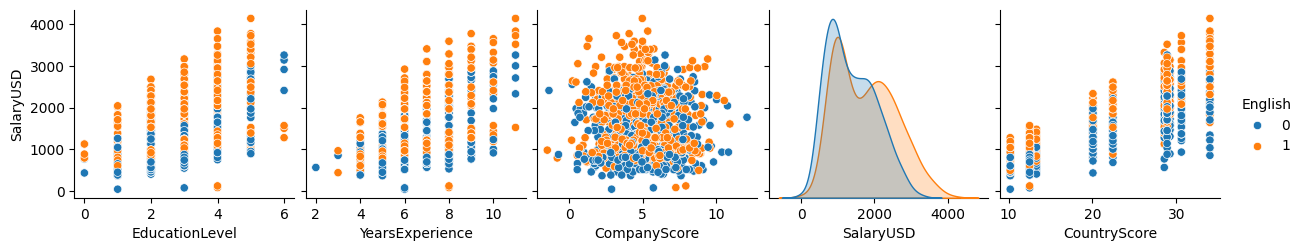

In [3]:
# Set figure size for consistency in visualization
fig=plt.figure(figsize=(10,5))

# Generate a pairplot to analyze the relationship between SalaryUSD and other variables,
# highlighting differences based on English language requirements.
sns.pairplot(data=df,y_vars='SalaryUSD',hue='English')
plt.show()

---
## **Training and Validation of Linear Regression Models**  

To develop a predictive model for estimating salaries in data science positions, three linear regression models were trained using different combinations of predictor variables. The models were evaluated to determine the most effective approach for salary prediction.  

### **Model Development**  

The dataset includes key job attributes such as English language requirement, education level, years of experience, company rating, and country innovation score. These variables were selected to explore their impact on salaries.  

To train the regression models, the following steps were performed:  

- The predictor matrix (X) and target variable (y) were defined.  
- The dataset was split into **training (70%) and testing (30%)** sets to ensure model validation.  
- Predictor variables were standardized to improve model performance.  


### **Regression Models Evaluated**  

Three models were developed based on different assumptions and theoretical foundations:  

#### **Model 1: `YearsExperience` and `EducationLevel`**  
This model is inspired by Mincer's equation, which suggests that salary is primarily determined by an individual's education level and work experience.


In [4]:
# Import necessary modules for model development and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define the target variable (Salary in USD)
y = df['SalaryUSD']

In [5]:
# Select predictor variables for Model 1
X1 = df[['YearsExperience', 'EducationLevel']]

# Split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

# Standardize the predictor variables using StandardScaler
sc1 = StandardScaler()
X1_train_sc = sc1.fit_transform(X1_train)
X1_test_sc = sc1.transform(X1_test)

# Train the linear regression model
model1 = LinearRegression()
model1.fit(X1_train_sc, y_train)

# Generate predictions for both training and test sets
y_train_pred1 = model1.predict(X1_train_sc)
y_test_pred1 = model1.predict(X1_test_sc)

# Compute performance metrics
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))

# Display performance metrics
print("Model 1: 'YearsExperience' and 'EducationLevel'")
print(f"R² (Train): {r2_train1:.4f}")
print(f"R² (Test): {r2_test1:.4f}")
print(f"RMSE (Train): {rmse_train1:.4f}")
print(f"RMSE (Test): {rmse_test1:.4f}")

Model 1: 'YearsExperience' and 'EducationLevel'
R² (Train): 0.2129
R² (Test): 0.2404
RMSE (Train): 663.5802
RMSE (Test): 677.9395


#### **Model 2: `English`, `YearsExperience`, `EducationLevel`, and `CountryScore`**  
This model extends the first by incorporating additional variables:  
- **English language proficiency**, as previous analysis showed a positive correlation with salary.  
- **CountryScore**, which reflects the macroeconomic environment and innovation levels of each country.  

In [6]:
# Define predictor variables for Model 2
# This model expands upon Model 1 by incorporating English language requirements and country-level economic conditions
X2 = df[['English', 'YearsExperience', 'EducationLevel', 'CountryScore']]

# Split the data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Standardize predictor variables using StandardScaler to improve model performance
sc2 = StandardScaler()
X2_train_sc = sc2.fit_transform(X2_train)
X2_test_sc = sc2.transform(X2_test)

# Train the linear regression model
model2 = LinearRegression()
model2.fit(X2_train_sc, y_train)

# Generate predictions for both training and test sets
y_train_pred2 = model2.predict(X2_train_sc)
y_test_pred2 = model2.predict(X2_test_sc)

# Compute performance metrics
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))

# Display performance metrics
print("Model 2: 'English', 'YearsExperience', 'EducationLevel', 'CountryScore'")
print(f"R² (Train): {r2_train2:.4f}")
print(f"R² (Test): {r2_test2:.4f}")
print(f"RMSE (Train): {rmse_train2:.6f}")
print(f"RMSE (Test): {rmse_test2:.6f}")

Model 2: 'English', 'YearsExperience', 'EducationLevel', 'CountryScore'
R² (Train): 0.9522
R² (Test): 0.9473
RMSE (Train): 163.600560
RMSE (Test): 178.479449


#### **Model 3: All available predictor variables**  
This model includes **all the available features** to assess the combined effect of multiple factors on salary. The goal is to determine whether adding more predictors improves the model's accuracy.  

In [7]:
# Define predictor variables for Model 3
# This model incorporates all available predictors to assess the combined effect of multiple factors on salary estimation
X3 = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]

# Split the data into trainingand testing sets
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

# Standardize predictor variables using StandardScaler to ensure consistency
sc3 = StandardScaler()
X3_train_sc = sc3.fit_transform(X3_train)
X3_test_sc = sc3.transform(X3_test)

# Train the linear regression model
model3 = LinearRegression()
model3.fit(X3_train_sc, y_train)

# Generate predictions for both training and test sets
y_train_pred3 = model3.predict(X3_train_sc)
y_test_pred3 = model3.predict(X3_test_sc)

# Compute performance metrics
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)
rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))

# Display performance metrics
print("Model 3: All predictor variables")
print(f"R² (Train): {r2_train3:.4f}")
print(f"R² (Test): {r2_test3:.4f}")
print(f"RMSE (Train): {rmse_train3:.6f}")
print(f"RMSE (Test): {rmse_test3:.6f}")


Model 3: All predictor variables
R² (Train): 0.9523
R² (Test): 0.9478
RMSE (Train): 163.416171
RMSE (Test): 177.744073


---
## **Model Performance Evaluation**  

Each model was assessed using key performance metrics to determine its effectiveness in predicting salaries:  

- **R^2 Score** – Represents the proportion of salary variance explained by the model. A higher R^2 indicates better explanatory power.
- **Root Mean Squared Error (RMSE)** – Measures the average prediction error in USD. A lower RMSE signifies more precise salary estimations.

### **Results & Analysis**  


| **Model**  | **R²** <br> *(Higher is Better)* | **RMSE** <br> *(Lower is Better, USD)* | **Performance Insights** |
|:---------:|:------------------:|:------------------:|---------------------------|
| **Model 1** | 0.2404 | 677.94 | Struggles to capture salary determinants, as it explains only 24% of the variance. Experience and education alone are insufficient for accurate predictions. |
| **Model 2** | 0.9473 | 178.48 | Demonstrates a significant improvement, explaining 94.73% of salary variability. The inclusion of English proficiency and CountryScore enhances prediction accuracy. |
| **Model 3** | **0.9478** | **177.74** | Slightly outperforms Model 2 with a marginally higher R² and a lower RMSE, making it the most precise model. |

### **Conclusion**  

Model 3 emerges as the best-performing model, offering the highest accuracy and lowest error rate. Its ability to capture salary determinants with greater precision makes it the most reliable choice for salary estimation.  

However, the difference between Model 2 and Model 3 is minimal, suggesting that both models are strong candidates for prediction. In practical applications, either could be used effectively depending on specific analytical needs.

---
## **Prediction Using a Linear Regression**  

To illustrate the application of **Model 3**, a salary prediction is generated for a hypothetical data scientist position with the following characteristics:  

- **English Proficiency:** Yes  
- **Education Level:** Postgraduate Degree (6)  
- **Years of Experience:** 2 years  
- **Company Score:** 7.5 (High-rated workplace)  
- **Country Score:** 34.0  

These values are processed through the trained model to estimate the expected salary, offering insights into potential earnings for similar job roles. This prediction serves as an example of how the model evaluates multiple factors to determine salary levels within the data science job market.


In [8]:
# Define characteristics of the new job position as a DataFrame
new_job = pd.DataFrame([[1, 6, 2, 7.5, 34.0]], columns=['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore'])

# Standardize the new data using the previously fitted scaler
new_job_sc = sc3.transform(new_job)

# Predict the salary using Model 3
predicted_salary = model3.predict(new_job_sc)

# Display the predicted salary in USD
print(f"Estimated salary for the new job position: ${predicted_salary[0]:,.2f} USD")


Estimated salary for the new job position: $2,666.21 USD


---

## **Training and Validation of k-Nearest Neighbors (k-NN) Regression Model**  

To enhance salary prediction accuracy, a k-Nearest Neighbors (k-NN) regression model was trained using the optimal combination of predictor variables identified in the previous section. The model's performance was evaluated and compared against the best-performing linear regression model to determine its predictive effectiveness.

### **Model Development**  

The k-NN regression model was trained with **k = 3**, meaning that the predicted salary for a given job listing is determined by the three most similar job postings in the dataset. The following steps were undertaken:  

- **Feature Selection** – The model utilized the same predictor variables as Model 3, ensuring consistency in comparisons.  
- **Data Splitting** – The dataset was divided into **70% training and 30% testing** subsets to assess model generalization.  
- **Model Training** – A k-NN regression model with k = 3 was implemented to analyze salary patterns based on nearest neighbors.  
- **Performance Evaluation** – The model’s accuracy was assessed using R^2 (coefficient of determination) and RMSE (Root Mean Squared Error), providing insights into its predictive reliability.

In [9]:
# Import necessary module for k-Nearest Neighbors regression
from sklearn.neighbors import KNeighborsRegressor

# Define predictor variables and target variable based on Model 3
X_knn = df[['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore']]
y_knn = df['SalaryUSD']

# Split the dataset into training (70%) and testing (30%) sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

# Standardize predictor variables to ensure consistency
sc_knn = StandardScaler()
X_train_knn_sc = sc_knn.fit_transform(X_train_knn)
X_test_knn_sc = sc_knn.transform(X_test_knn)

# Train the k-NN regression model with k=3
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train_knn_sc, y_train_knn)

# Generate predictions for both training and test sets
y_train_knn_pred = knn_model.predict(X_train_knn_sc)
y_test_knn_pred = knn_model.predict(X_test_knn_sc)

# Compute performance metrics
r2_train_knn = r2_score(y_train_knn, y_train_knn_pred)
r2_test_knn = r2_score(y_test_knn, y_test_knn_pred)
rmse_train_knn = np.sqrt(mean_squared_error(y_train_knn, y_train_knn_pred))
rmse_test_knn = np.sqrt(mean_squared_error(y_test_knn, y_test_knn_pred))

# Display performance metrics
print("Performance Metrics for k-NN Regression Model (k=3) - Using Model 3 Variables:")
print(f"R² (Train): {r2_train_knn:.4f}")
print(f"R² (Test): {r2_test_knn:.4f}")
print(f"RMSE (Train): {rmse_train_knn:.4f}")
print(f"RMSE (Test): {rmse_test_knn:.4f}")


Performance Metrics for k-NN Regression Model (k=3) - Using Model 3 Variables:
R² (Train): 0.9816
R² (Test): 0.9631
RMSE (Train): 101.3970
RMSE (Test): 149.4174


---

## **Performance Evaluation of k-NN Regression Model**  

The k-NN regression model was trained using k = 3, leveraging Model 3 variables for salary prediction. The model's performance was assessed using key evaluation metrics to determine its effectiveness in capturing salary patterns while avoiding overfitting or underfitting.  

### **Performance Metrics (k = 3)**  

| **Metric** | **Training Set** | **Testing Set** |
|:---------:|:--------------:|:--------------:|
| **R²** *(Higher is Better)* | 0.9816 | 0.9631 |
| **RMSE** *(Lower is Better)* | 101.40 | 149.42 |


#### **Assessing Overfitting and Underfitting**  

Overfitting occurs when a model performs exceptionally well on training data but fails to generalize to unseen test data. This is typically identified when R^2 is significantly higher in training compared to testing or when RMSE is much lower for training data than for test data.  

In this case:  

- The R^2 scores for training (0.9816) and testing (0.9631) are both high and closely aligned, indicating that the model generalizes well.  
- The RMSE for testing (149.42) is slightly higher than for training (101.40), but the difference remains moderate, suggesting the model is not overly complex or excessively tuned to the training data.  

These results indicate that the model is **neither overfitting nor underfitting** and maintains a strong balance between predictive accuracy and generalizability.

#### **Selecting an Optimal k Value**  

To ensure k = 3 was an appropriate choice, different values of k were analyzed using the **elbow method**:

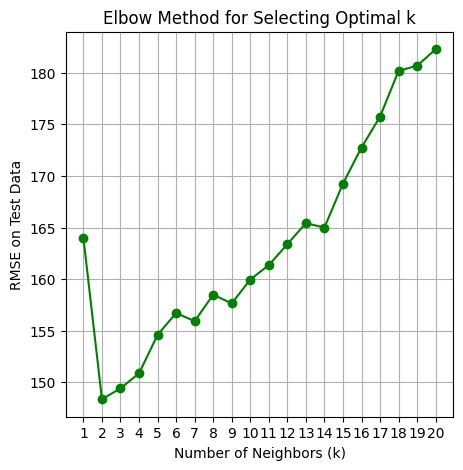

In [10]:
# Define range of k values to evaluate
k_values = range(1, 21)  # Exploring k values from 1 to 20
rmse_test_values = []

# Iterate over different k values to evaluate model performance
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_knn_sc, y_train_knn)

    # Generate predictions for the test set
    y_test_knn_pred = knn_model.predict(X_test_knn_sc)

    # Compute RMSE for the test set
    rmse_test = np.sqrt(mean_squared_error(y_test_knn, y_test_knn_pred))
    rmse_test_values.append(rmse_test)

# Plot RMSE vs. k values to apply the elbow method
plt.figure(figsize=(5, 5))
plt.plot(k_values, rmse_test_values, marker='o', linestyle='-', color='g')
plt.title("Elbow Method for Selecting Optimal k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE on Test Data")
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### **Results**

- **k = 1** had high RMSE, making the model overly sensitive to noise.  
- **k = 2** had the lowest RMSE but risked overfitting.  
- **k = 3** provided the best trade-off, maintaining low RMSE while improving generalization.  
- **For k > 3, RMSE increased**, reducing prediction precision.  

Although k = 2 had the lowest RMSE, k = 3 was chosen for its better generalization, making it the most reliable option for salary estimation.

---

### **Prediction Using k-NN Model**  

To demonstrate the application of the k-NN regression model (k = 3), a salary prediction is generated for a hypothetical data scientist position with the following characteristics:  

- **English Proficiency:** Yes  
- **Education Level:** Postgraduate Degree (6)  
- **Years of Experience:** 2 years  
- **Company Score:** 7.5 (High-rated workplace)  
- **Country Score:** 34.0  

These values are standardized and processed through the trained k-NN model to estimate the expected salary, providing insights into potential earnings for similar job roles. By leveraging the k-NN approach, the model compares this job profile to the most similar job listings in the dataset, ensuring salary estimations are based on relevant market trends.

In [11]:
# Define the characteristics of a new job position
# Order: [English, EducationLevel, YearsExperience, CompanyScore, CountryScore]
new_job = pd.DataFrame([[1, 6, 2, 7.5, 34.0]],
                       columns=['English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'CountryScore'])

# Standardize the new data using the previously fitted scaler
new_job_sc = sc_knn.transform(new_job)  # Apply the same transformation as training data

# Predict the salary using the trained k-NN model
predicted_salary = knn_model.predict(new_job_sc)

# Display the predicted salary in USD
print(f"Estimated salary for the new job position: ${predicted_salary[0]:,.2f} USD")


Estimated salary for the new job position: $2,429.75 USD


---

## **Comparison: k-NN vs. Linear Regression**  

To identify the best-performing model, the k-NN model (k = 3) was compared against the best-performing linear regression model (Model 3).  

| **Model** | **R^2 (Training)** | **R^2 (Testing)** | **RMSE (Training)** | **RMSE (Testing)** |
|:---------:|:----------------:|:----------------:|:------------------:|:------------------:|
| **k-NN (k = 3)** | **0.9816** | **0.9631** | **101.40** | **149.42** |
| **Linear Regression (Model 3)** | 0.9523 | 0.9478 | 163.42 | 177.74 |

### **Key Findings**  

**1. Higher Predictive Accuracy**  
   - The k-NN model (k = 3) outperforms linear regression, achieving a higher R^2 score in both training (0.9816) and testing (0.9631), meaning it explains more of the salary variability.  
   - The relatively small difference between the training and testing R^2 scores suggests that both models generalize well, but k-NN demonstrates better overall performance.  

**2. Lower Prediction Error (RMSE)**  
   - The k-NN model has a lower RMSE in both training (101.40) and testing (149.42), indicating more precise salary predictions compared to the linear regression model (RMSE: 163.42 training, 177.74 testing).  
   - Since k-NN can capture nonlinear relationships, it provides a better fit than linear regression, which assumes a strict linear relationship and may not fully capture salary variations.  

---

## **Conclusion**  

The k-NN regression model (k = 3) is the best-performing model for salary prediction in this dataset. Its ability to capture complex, nonlinear patterns leads to higher accuracy and lower prediction error compared to linear regression, making it the preferred choice for this analysis.